# Test Estimation Classification Prediction 検定 推定 分類 予測

## Test 検定
### Two SNPs and their haplotypes

[What is a SNP?](https://en.wikipedia.org/wiki/Single-nucleotide_polymorphism)

[What is a haplotype?](https://en.wikipedia.org/wiki/Haplotype)

Assume two SNPs, Sa and Sb whose alleles are (A,a) and (B,b), respectively, with four haplotypes, (A-B), (A-b), (a-B), and (a,b).

Sa vs. Sb| B|  b|Column sum
---------|--|---| ----
A        |45|15| 60
a        |25|15| 40
Row sum  |70|30|100

We want to know whether combination of (A,a) and (B,b) are independent or not.

When we believe (A,a) and (B,b) are mutually independent, how often do we observe the table above or the tables that are rarer than the observed table?

Statistical test to reject the null hypothesis of independence returns p-value that is the sum of probability of tables probability of occurence are equal to or smaller than one of the observed table where the condition the marginal counts of the table are fixed.

In [24]:
tab <- matrix(c(45,25,15,15),ncol=2,nrow=2)
print(tab)
fisher.test(tab)

     [,1] [,2]
[1,]   45   15
[2,]   25   15



	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.191
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6894002 4.6759321
sample estimates:
odds ratio 
  1.789162 


## Estimation 推定
### Risk factor of a disease

[What is odds ratio?](https://en.wikipedia.org/wiki/Odds_ratio)

Assume a case-control study for a disease and its risk factor.

Disease vs. Risk factor|+ |- |Column sum
---------|--|---| ----
Affected |45|15| 60
Healthy  |25|15| 40
Row sum  |70|30|100

Odds ratio is a substitute of [relative risk](https://en.wikipedia.org/wiki/Relative_risk#Comparison_to_the_odds_ratio). 

We want to know the value of relative risk.

We have to estimate the value.

We can have a value as an estimator, that is "point estimate".

We can have an interval as an estimator, that is "interval estimate".

We can have a distribution as estimator, that is "distribution estimate". # No output example

Of course we can test the independence between (affected, healthy) and (Risk +, -).

In [25]:
fisher.test(h.table)


	Fisher's Exact Test for Count Data

data:  h.table
p-value = 0.191
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.6894002 4.6759321
sample estimates:
odds ratio 
  1.789162 


## Classification 分類

### Mixture distribution 混合分布

Assume a distribution that is a mixture of three 2-dimensional normal distributions and samples from it.

If a plot appears with the following R codes looks too separated or too un-separated, re-run the codes.

[1] 0.5436125 0.2671286 0.1892590

gr.label
  1   2   3 
261 138 101 

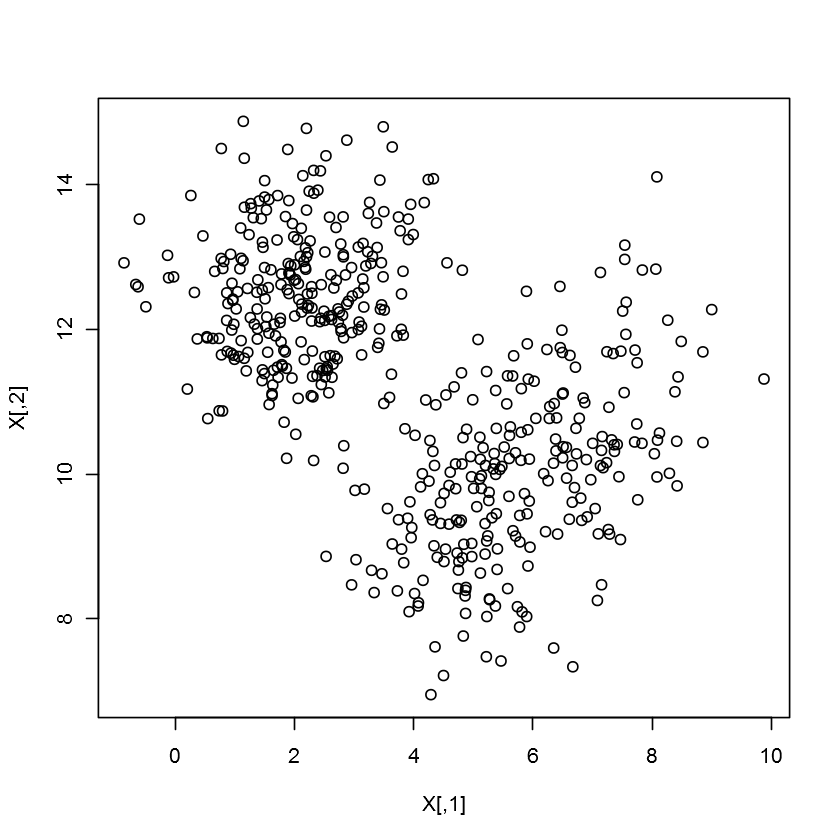

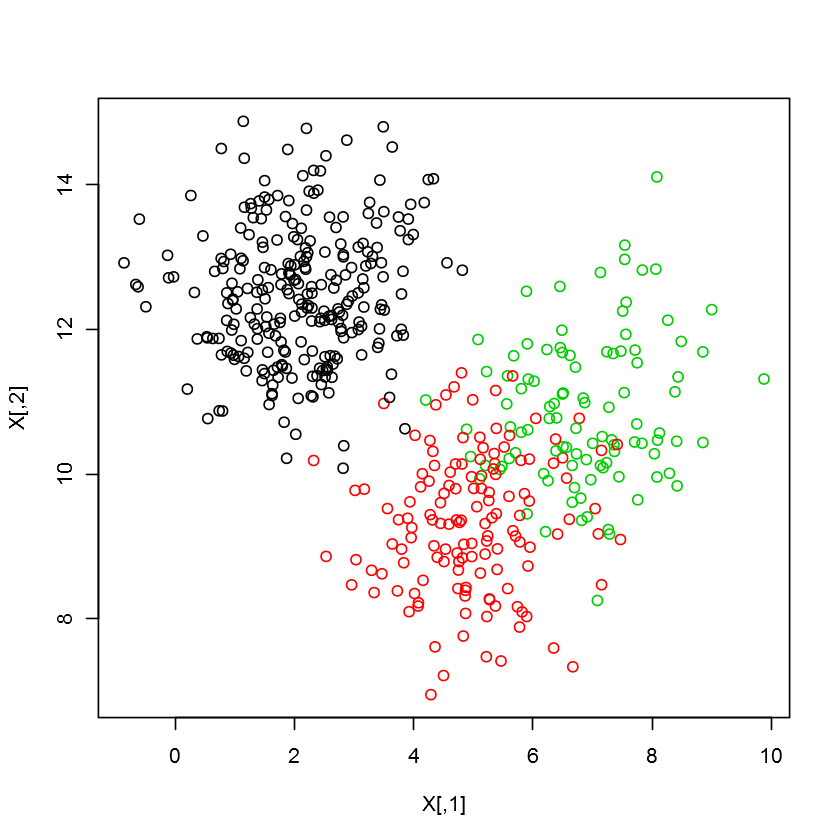

In [37]:
n.gr <- 3 # number of component distributions
d <- 2 # dimension
# Fraction of n.gr distributions
f <- runif(n.gr)
f <- f/sum(f)
f
# means
ms <- matrix(runif(n.gr*d),ncol=d)*15
# var-covar matrices are unit matrix for all components

# Sampling
n.sample <- 500
gr.label <- sample(1:3,n.sample,replace=TRUE,prob=f)
table(gr.label)
# locations of samples
X <- matrix(0,n.sample,d)
for(i in 1:n.sample){
    this.gr <- gr.label[i]
    X[i,] <- c(rnorm(1,ms[this.gr,1]),rnorm(1,ms[this.gr,2]))
}

plot(X)
plot(X,col=gr.label) # color with group label

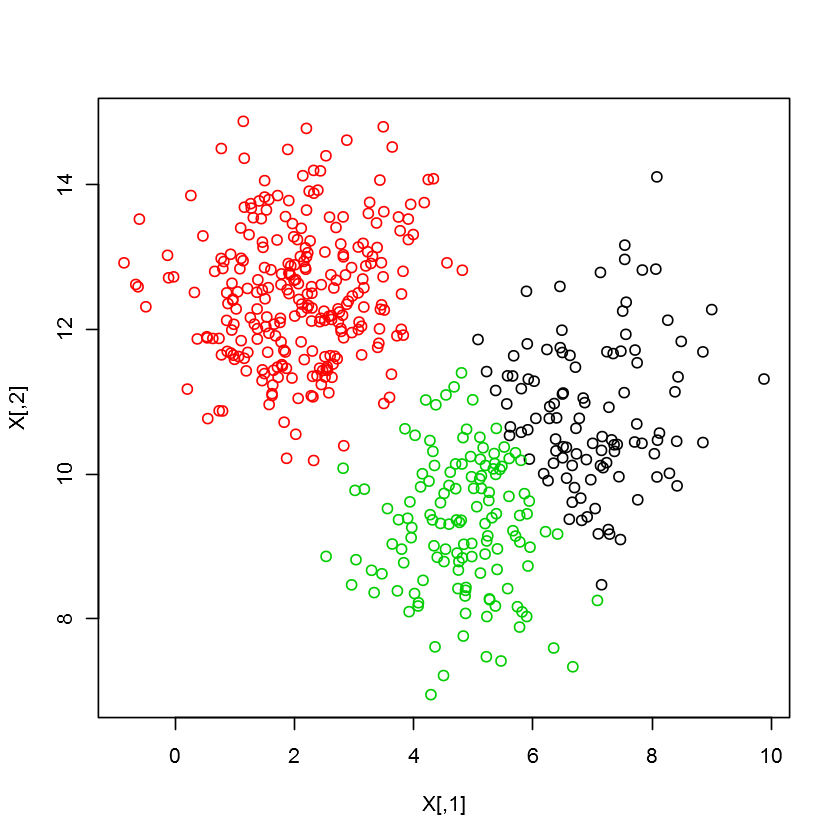

In [48]:
cl <- kmeans(X,n.gr)
plot(X, col = cl$cluster)


  2   3   4   5   6   7   9 
259   2  17   2 119  89  12 

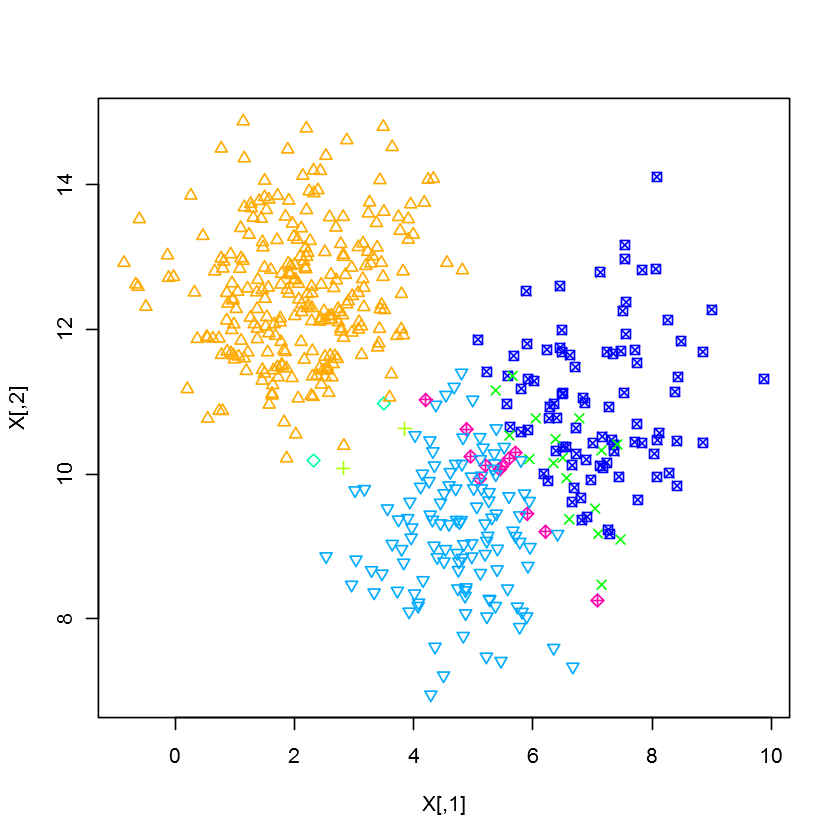

In [51]:
plot(X, col = rainbow(9)[(cl$cluster-1) + 3*(gr.label-1)+1],pch=(cl$cluster-1) + 3*(gr.label-1)+1)
table((cl$cluster-1) + 3*(gr.label-1)+1)

### Assignment 課題 (Math)

In the above plot, a formula (cl$cluster-1) + 3^(gr.label-1) + 1 was used to specify 9 patterns, 3 true labels x 3 classification labels. It is ternary numbering system-based conversion. Describe the formula.

## Prediction 予測